In [31]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


## Loading the necessary libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud, STOPWORDS

### Here we will load the text file and extract the type of message i.e spam/ham and the actual message itself

In [37]:
# Load the .txt file
file_path = "C:/Users/mohsi/Downloads/sms+spam+collection/SMSSpamCollection"  # Update with your actual path
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Extract type and message
message_types, messages = [], []
for line in lines:
    split_line = line.strip().split("\t", 1)  # Assuming tab-separated format
    if len(split_line) == 2:
        message_types.append(split_line[0])
        messages.append(split_line[1])

# Create DataFrame
sms_df = pd.DataFrame({'type': message_types, 'message': messages})

# Display first few rows
print(sms_df.head())

   type                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [39]:
sms_df.shape

(5574, 2)

### The dataset contains 5574 messages 

In [42]:
sms_df.head(10)

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [17]:
sms_df.tail

<bound method NDFrame.tail of       type                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5569  spam  This is the 2nd time we have tried 2 contact u...
5570   ham               Will ü b going to esplanade fr home?
5571   ham  Pity, * was in mood for that. So...any other s...
5572   ham  The guy did some bitching but I acted like i'd...
5573   ham                         Rofl. Its true to its name

[5574 rows x 2 columns]>

In [19]:
print(sms_df['type'].value_counts())

type
ham     4827
spam     747
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1a83da5e030>,
 [Text(-1.0039394445155985, 0.4495615550130057, 'ham'),
  Text(1.003939423470102, -0.449561602010803, 'spam')],
 [Text(-0.5476033333721445, 0.24521539364345762, '86.60'),
  Text(0.5476033218927828, -0.24521541927861978, '13.40')])

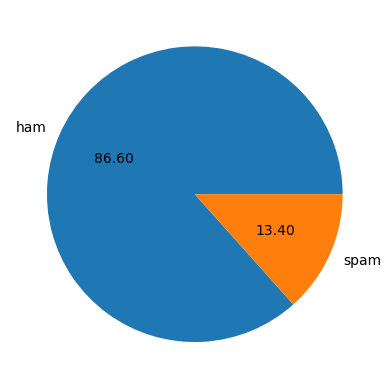

In [21]:
plt.pie(sms_df['type'].value_counts(),labels=['ham','spam'], autopct = "%0.2f")

### 86.5% of the messages are of ham category(i.e the not a spam) category and only 13.4% of the messages are of 'spam' category. This shows that the dataset is imbalanced and has to be handled accordingly before applying a machine learning/deep learning model.

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Now we will find the number of characters, number of words and number of sentences in each message using the nltk library and create a seperate column for each of the three values.

In [57]:
sms_df['num_characters']=sms_df['message'].apply(len)

In [61]:
sms_df['num_words']=sms_df['message'].apply(lambda x : len(nltk.word_tokenize(x)))

In [65]:
sms_df['num_sentences']=sms_df['message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [67]:
sms_df.head()

,type,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [69]:
sms_df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5574.000000,5574.000000,5574.000000
mean,80.445102,18.854324,2.005920
std,59.842035,13.838509,1.539876
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


### From the above summary statistics the average number of characters, average number of words and average number of sentences is 80,19 and 2 respectively.

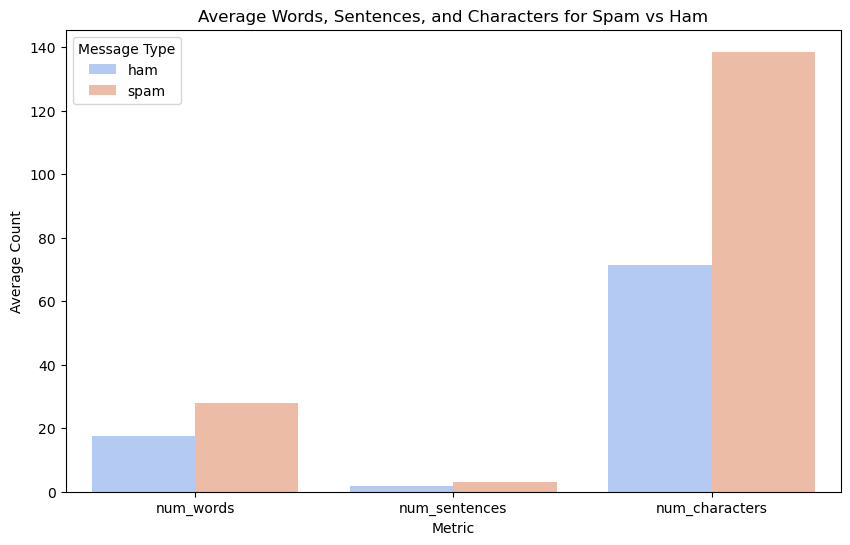

In [75]:
# Calculate averages grouped by 'type'
averages = sms_df.groupby('type')[['num_words', 'num_sentences', 'num_characters']].mean().reset_index()

# Reshape data for easier plotting (melt for combined barplot)
averages_melted = averages.melt(id_vars='type', var_name='Metric', value_name='Average')

# Barplot for averages
plt.figure(figsize=(10, 6))
sns.barplot(data=averages_melted, x='Metric', y='Average', hue='type', palette='coolwarm')
plt.title('Average Words, Sentences, and Characters for Spam vs Ham')
plt.xlabel('Metric')
plt.ylabel('Average Count')
plt.legend(title='Message Type')
plt.show()

### Spam messages consistently show higher averages: around 28 words compared to 18 for ham, slightly more sentences, and significantly more characters (138 vs 72). This indicates spam messages are typically longer and more verbose than legitimate messages.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


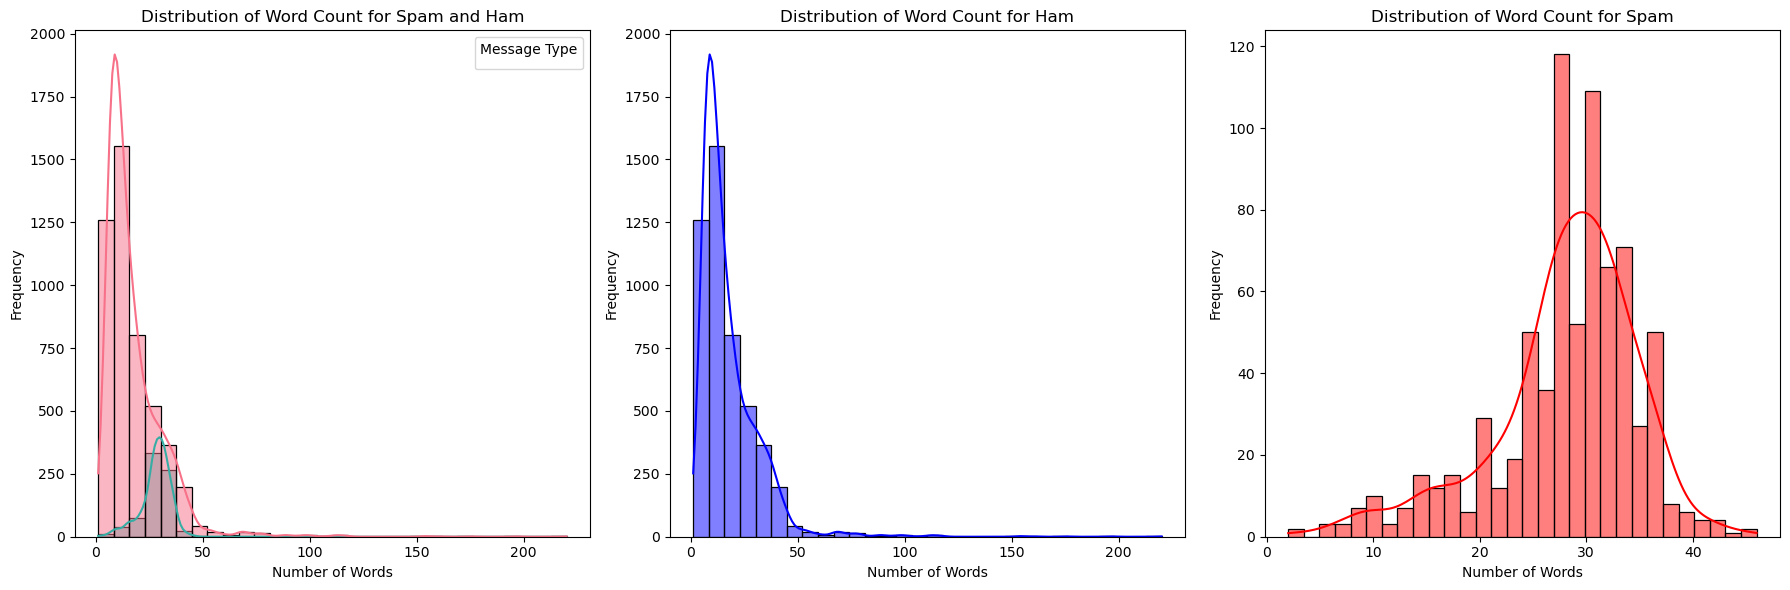

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for both Spam and Ham
sns.histplot(data=sms_df, x='num_words', hue='type', kde=True, palette='husl', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Word Count for Spam and Ham')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Message Type')

# Plot for Ham only
sns.histplot(data=sms_df[sms_df['type'] == 'ham'], x='num_words', kde=True, color='blue', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Word Count for Ham')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

# Plot for Spam only
sns.histplot(data=sms_df[sms_df['type'] == 'spam'], x='num_words', kde=True, color='red', bins=30, ax=axes[2])
axes[2].set_title('Distribution of Word Count for Spam')
axes[2].set_xlabel('Number of Words')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### The word count distributions for spam and ham messages show distinctly different patterns. Ham messages (blue) display a right-skewed distribution with most messages containing 0-25 words, peaking sharply at around 10 words. In contrast, spam messages (red) follow a more normal distribution centered around 25-30 words, with a wider spread. The overlaid plot shows minimal overlap between the two distributions, suggesting word count could be a useful feature for spam detection. Ham messages tend to be more concise, while spam messages are consistently longer and show more variability in length. The clear separation between distributions indicates that message length is a strong discriminator between spam and legitimate messages.

In [129]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_percentage = float((len(outliers) / len(data)) * 100)
    return outliers, outlier_percentage

Percentage of outliers in the entire dataset: 1.40%
Percentage of outliers in Ham messages: 2.51%
Percentage of outliers in Spam messages: 5.89%


C:\Users\mohsi\AppData\Local\Temp\ipykernel_36768\3427320002.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sms_df, x='type', y='num_words', palette='husl', ax=axes[0])


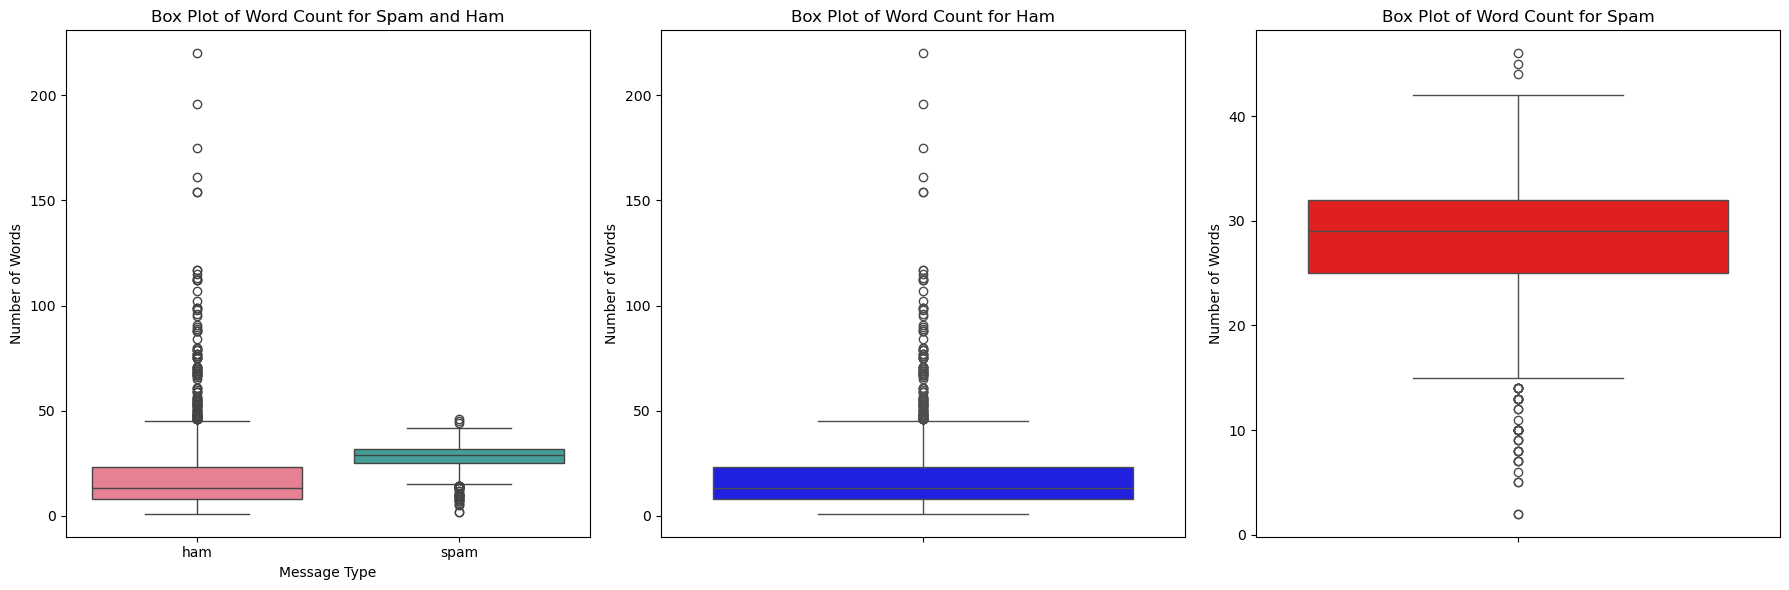

In [131]:
# Calculate outliers and their percentage for the entire dataset
outliers_all, outlier_percentage_all = calculate_outliers(sms_df, 'num_words')

# Calculate outliers and their percentage for Ham and Spam
outliers_ham, outlier_percentage_ham = calculate_outliers(sms_df[sms_df['type'] == 'ham'], 'num_words')
outliers_spam, outlier_percentage_spam = calculate_outliers(sms_df[sms_df['type'] == 'spam'], 'num_words')

# Print the outlier percentages
print(f"Percentage of outliers in the entire dataset: {outlier_percentage_all:.2f}%")
print(f"Percentage of outliers in Ham messages: {outlier_percentage_ham:.2f}%")
print(f"Percentage of outliers in Spam messages: {outlier_percentage_spam:.2f}%")

# Create subplots (3 graphs side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for both Spam and Ham
sns.boxplot(data=sms_df, x='type', y='num_words', palette='husl', ax=axes[0])
axes[0].set_title('Box Plot of Word Count for Spam and Ham')
axes[0].set_xlabel('Message Type')
axes[0].set_ylabel('Number of Words')

# Box plot for Ham only
sns.boxplot(data=sms_df[sms_df['type'] == 'ham'], y='num_words', color='blue', ax=axes[1])
axes[1].set_title('Box Plot of Word Count for Ham')
axes[1].set_ylabel('Number of Words')

# Box plot for Spam only
sns.boxplot(data=sms_df[sms_df['type'] == 'spam'], y='num_words', color='red', ax=axes[2])
axes[2].set_title('Box Plot of Word Count for Spam')
axes[2].set_ylabel('Number of Words')

# Adjust layout
plt.tight_layout()
plt.show()

### The box plots compare word count distributions between spam and ham messages. Ham messages (shown in pink/blue) have a lower median around 10-15 words but display high variability with outliers reaching 200 words. The interquartile range is smaller, concentrated between 0-20 words. In contrast, spam messages (shown in teal/red) have a higher median of 25-30 words with a more compact distribution between 20-40 words. While ham messages show numerous outliers above 100 words, spam messages have fewer extreme values. The clear separation in typical word counts between spam and ham suggests message length could be an effective feature for spam detection.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


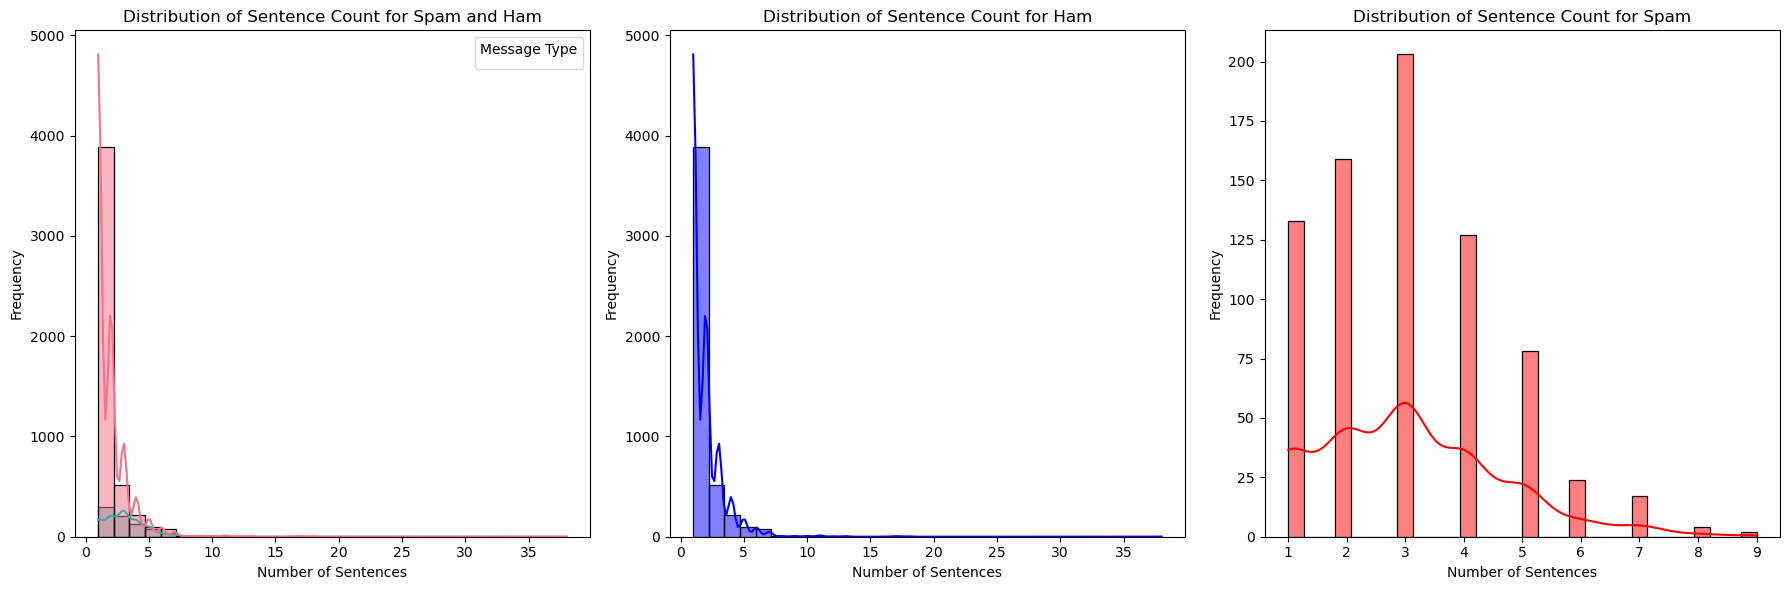

C:\Users\mohsi\AppData\Local\Temp\ipykernel_36768\808165292.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sms_df, x='type', y='num_sentences', palette='husl', ax=axes[0])


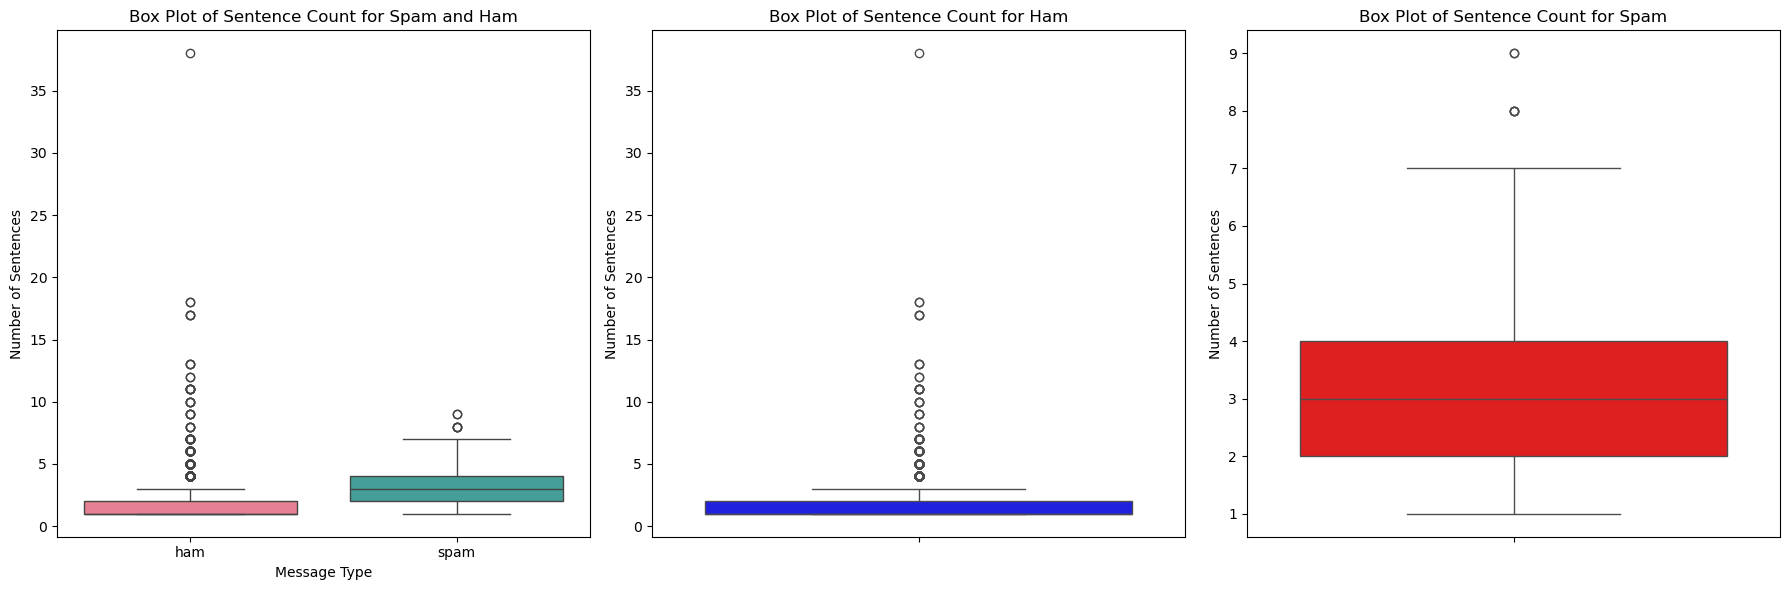

In [133]:
# Create subplots (3 graphs side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for both Spam and Ham (num_sentences)
sns.histplot(data=sms_df, x='num_sentences', hue='type', kde=True, palette='husl', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Sentence Count for Spam and Ham')
axes[0].set_xlabel('Number of Sentences')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Message Type')

# Plot for Ham only (num_sentences)
sns.histplot(data=sms_df[sms_df['type'] == 'ham'], x='num_sentences', kde=True, color='blue', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Sentence Count for Ham')
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')

# Plot for Spam only (num_sentences)
sns.histplot(data=sms_df[sms_df['type'] == 'spam'], x='num_sentences', kde=True, color='red', bins=30, ax=axes[2])
axes[2].set_title('Distribution of Sentence Count for Spam')
axes[2].set_xlabel('Number of Sentences')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# Create subplots (3 graphs side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for both Spam and Ham (num_sentences)
sns.boxplot(data=sms_df, x='type', y='num_sentences', palette='husl', ax=axes[0])
axes[0].set_title('Box Plot of Sentence Count for Spam and Ham')
axes[0].set_xlabel('Message Type')
axes[0].set_ylabel('Number of Sentences')

# Box plot for Ham only (num_sentences)
sns.boxplot(data=sms_df[sms_df['type'] == 'ham'], y='num_sentences', color='blue', ax=axes[1])
axes[1].set_title('Box Plot of Sentence Count for Ham')
axes[1].set_ylabel('Number of Sentences')

# Box plot for Spam only (num_sentences)
sns.boxplot(data=sms_df[sms_df['type'] == 'spam'], y='num_sentences', color='red', ax=axes[2])
axes[2].set_title('Box Plot of Sentence Count for Spam')
axes[2].set_ylabel('Number of Sentences')

# Adjust layout
plt.tight_layout()
plt.show()


### he distribution plots reveal distinct patterns: ham messages show a highly skewed distribution with peak frequency around 1-2 sentences, dropping sharply after 5 sentences. Over 4,000 ham messages contain just 1-2 sentences. In contrast, spam messages display a more uniform distribution between 1-4 sentences, with the highest frequency around 3 sentences (200 messages), and gradually declining frequency up to 9 sentences.

### The box plots highlight clear differences: ham messages have a narrow interquartile range centered around 1-2 sentences, with numerous outliers extending up to 35 sentences. The median is close to 1 sentence. Spam messages show a higher median (3 sentences) and wider interquartile range (2-4 sentences), with fewer but more extreme outliers reaching 9 sentences. The distributions show minimal overlap, suggesting sentence count is a useful discriminator.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


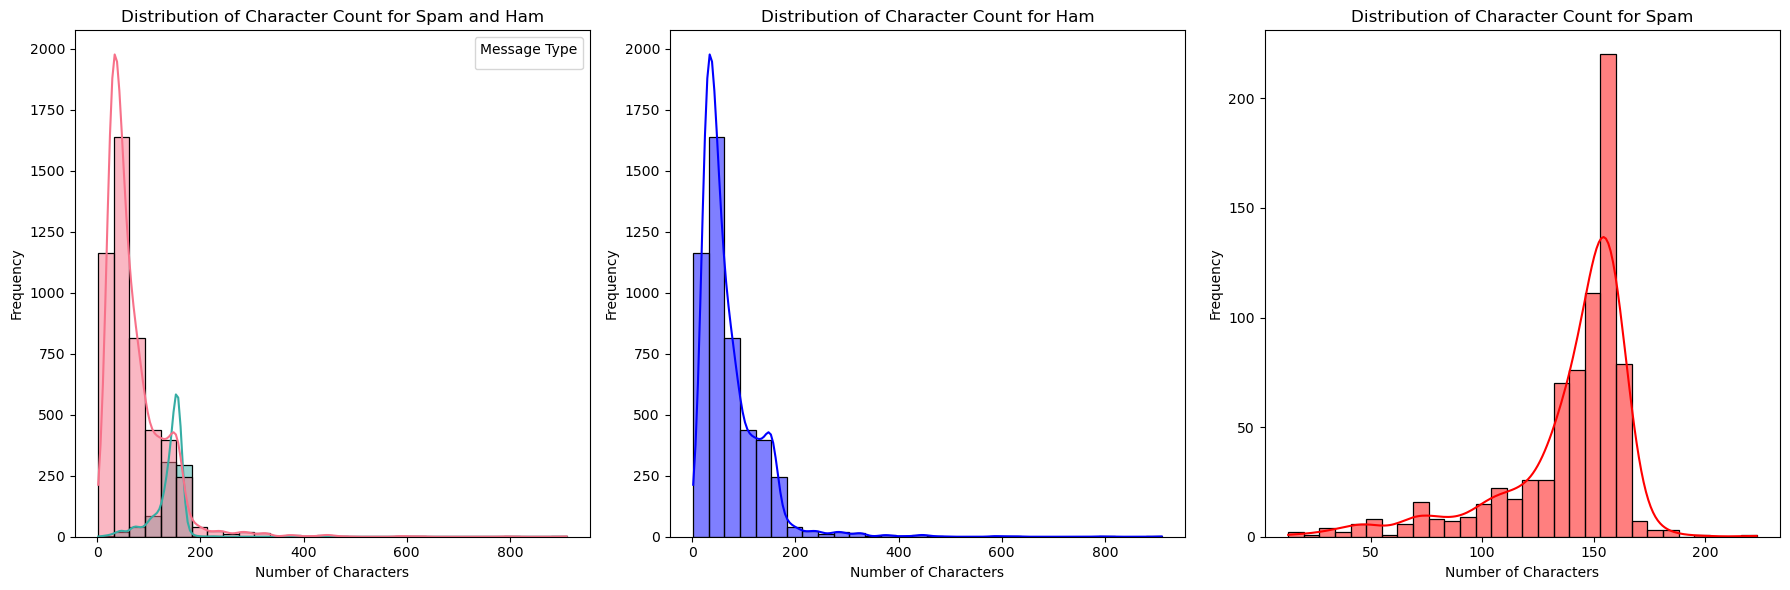

In [125]:
#Create subplots (3 graphs side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for both Spam and Ham (num_characters)
sns.histplot(data=sms_df, x='num_characters', hue='type', kde=True, palette='husl', bins=30, ax=axes[0])
axes[0].set_title('Distribution of Character Count for Spam and Ham')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Message Type')

# Plot for Ham only (num_characters)
sns.histplot(data=sms_df[sms_df['type'] == 'ham'], x='num_characters', kde=True, color='blue', bins=30, ax=axes[1])
axes[1].set_title('Distribution of Character Count for Ham')
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')

# Plot for Spam only (num_characters)
sns.histplot(data=sms_df[sms_df['type'] == 'spam'], x='num_characters', kde=True, color='red', bins=30, ax=axes[2])
axes[2].set_title('Distribution of Character Count for Spam')
axes[2].set_xlabel('Number of Characters')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### The character count distributions show distinct patterns between spam and ham messages. Ham messages (blue) display a strong right-skewed distribution peaking at around 50 characters, with frequency rapidly declining after 200 characters. In contrast, spam messages (red) show a more normal distribution centered around 150 characters, with higher average length. The clear separation between these distributions suggests character count could be an effective feature for spam detection.

Outlier percentage for num_characters: 1.2020093290276284
Outlier percentage for num_characters: 2.7760513776672884
Outlier percentage for num_characters: 9.63855421686747
outlier_percentage_all: 1.2020093290276284
outlier_percentage_ham: 2.7760513776672884
outlier_percentage_spam: 9.63855421686747
Percentage of outliers for all messages: 1.20%
Percentage of outliers for Ham messages: 2.78%
Percentage of outliers for Spam messages: 9.64%


C:\Users\mohsi\AppData\Local\Temp\ipykernel_36768\3503743377.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sms_df, x='type', y='num_characters', palette='husl', ax=axes[0])


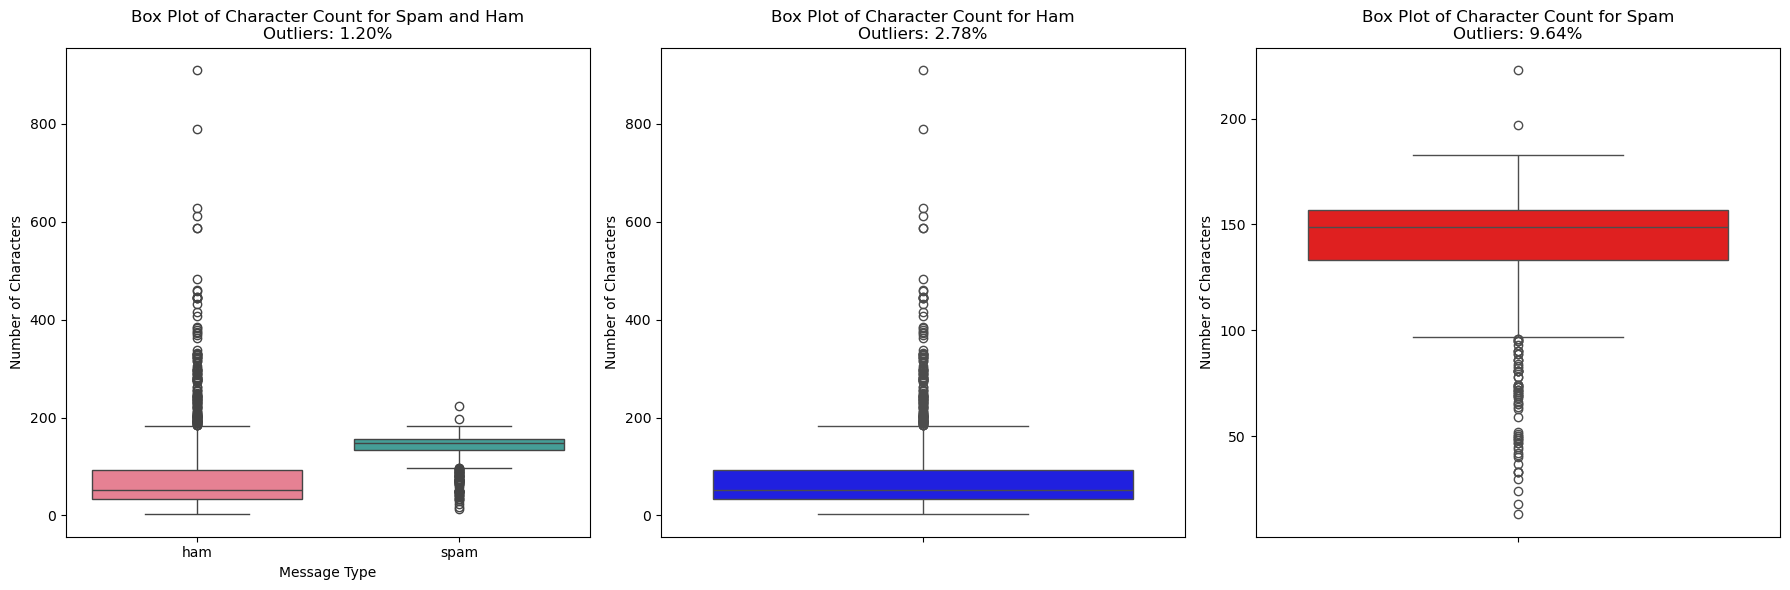

In [145]:
# Function to calculate outliers and their percentage
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100

    # Print the outlier_percentage to verify its value
    print(f"Outlier percentage for {column}: {outlier_percentage}")
    
    return float(outlier_percentage)

# Calculate outliers for the whole dataset (both Spam and Ham)
outlier_percentage_all = calculate_outliers(sms_df, 'num_characters')

# Calculate outliers for Ham only
outlier_percentage_ham = calculate_outliers(sms_df[sms_df['type'] == 'ham'], 'num_characters')

# Calculate outliers for Spam only
outlier_percentage_spam = calculate_outliers(sms_df[sms_df['type'] == 'spam'], 'num_characters')

# Print the outlier percentages directly to check their types
print(f"outlier_percentage_all: {outlier_percentage_all}")
print(f"outlier_percentage_ham: {outlier_percentage_ham}")
print(f"outlier_percentage_spam: {outlier_percentage_spam}")

# Now print the percentages in the formatted string
print(f"Percentage of outliers for all messages: {outlier_percentage_all:.2f}%")
print(f"Percentage of outliers for Ham messages: {outlier_percentage_ham:.2f}%")
print(f"Percentage of outliers for Spam messages: {outlier_percentage_spam:.2f}%")

# Create subplots (3 graphs side by side)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for both Spam and Ham (num_characters)
sns.boxplot(data=sms_df, x='type', y='num_characters', palette='husl', ax=axes[0])
axes[0].set_title(f'Box Plot of Character Count for Spam and Ham\nOutliers: {outlier_percentage_all:.2f}%')
axes[0].set_xlabel('Message Type')
axes[0].set_ylabel('Number of Characters')

# Box plot for Ham only (num_characters)
sns.boxplot(data=sms_df[sms_df['type'] == 'ham'], y='num_characters', color='blue', ax=axes[1])
axes[1].set_title(f'Box Plot of Character Count for Ham\nOutliers: {outlier_percentage_ham:.2f}%')
axes[1].set_ylabel('Number of Characters')

# Box plot for Spam only (num_characters)
sns.boxplot(data=sms_df[sms_df['type'] == 'spam'], y='num_characters', color='red', ax=axes[2])
axes[2].set_title(f'Box Plot of Character Count for Spam\nOutliers: {outlier_percentage_spam:.2f}%')
axes[2].set_ylabel('Number of Characters')

# Adjust layout
plt.tight_layout()
plt.show()


### The box plots reveal distinct character count patterns: ham messages (pink/blue) show a lower median around 75 characters with numerous outliers reaching 800 characters, while spam messages (teal/red) have a higher median around 150 characters. Ham messages display 2.78% outliers, mostly concentrated between 200-400 characters. Spam messages show 9.64% outliers and a more compact distribution, with their box spanning roughly 125-175 characters.

In [91]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [101]:
data = sms_df[['type','message']]

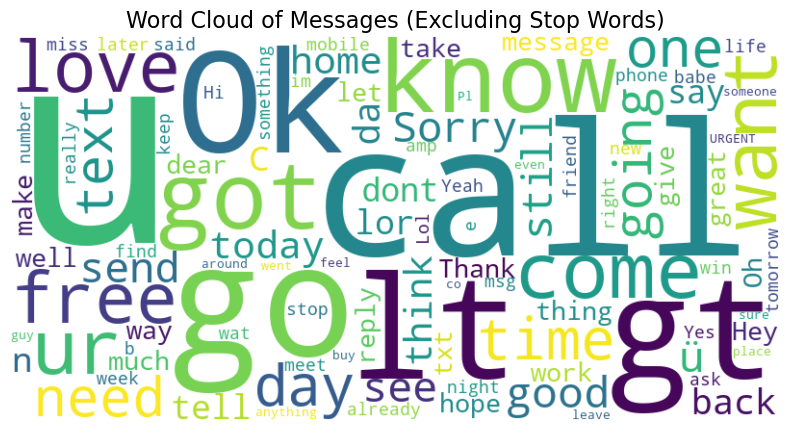

In [103]:
# Concatenate all messages into a single text string
text = ' '.join(data['message'])

# Define stopwords (combining NLTK stopwords and WordCloud stopwords)
stop_words = set(stopwords.words('english')).union(STOPWORDS)

# Generate word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    stopwords=stop_words, colormap='viridis', max_words=100
).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Messages (Excluding Stop Words)', fontsize=16)
plt.show()

In [48]:
# Define stopwords
stop_words = set(stopwords.words('english')).union(STOPWORDS)

# Generate word clouds for spam and ham separately
def generate_word_cloud(messages, title):
    text = ' '.join(messages)
    wordcloud = WordCloud(
        width=800, height=400, background_color='white',
        stopwords=stop_words, colormap='viridis', max_words=100
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Separate messages by type
spam_messages = data[data['type'] == 'spam']['message']
ham_messages = data[data['type'] == 'ham']['message']

# Create word clouds
generate_word_cloud(spam_messages, 'Word Cloud for Spam Messages')
generate_word_cloud(ham_messages, 'Word Cloud for Ham (Non-Spam) Messages')

NameError: name 'data' is not defined

### The word clouds reveal distinct patterns between spam and legitimate (ham) messages. The spam cloud prominently features commercial terms like "FREE," "URGENT," "mobile," "call," "prize," and "150ppm," along with domain-specific words like "txt" and "co_uk," indicating promotional or marketing content. In contrast, the ham messages show more personal and conversational language with prominent words like "love," "know," "got," "come," and "ok," reflecting everyday communication. The color schemes and word sizes effectively highlight frequency, with spam messages focusing on action and offers while ham messages emphasize relationships and daily interactions. This visualization clearly demonstrates the linguistic differences between spam and legitimate messages.

### There might be messages which do not have any alphabets. Such message could act like noise for this data set

In [111]:
import re

In [113]:

no_alpha_messages = data[data['message'].apply(lambda x: not bool(re.search('[a-zA-Z]', x)))]
print("Messages with no alphabetic characters:")
print(no_alpha_messages)

Messages with no alphabetic characters:
     type  message
1612  ham      645
3376  ham       :)
4824  ham  :-) :-)


### There are 3 such messages in the dataset